In [20]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from typing import List, Tuple
from itertools import product, combinations
import matplotlib.patches as patches
import random
import itertools
from scipy import stats

import SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3 as ss3
from importlib import reload

In [21]:
# Read data from JSON
run_data = pd.read_json(f'run_data_sequential_12_5_02.json', orient='records')
run_data

,sim_id,local_sim_id,sort_mode,move_mode,cooling_function,markov_length,positions_over_time,forces_over_time,energies_over_time,total_energy_over_time,evaluation_number
0,0,0,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-2.598462447, 0.09057825950000001], [-3.922...","[[[0.2572254739, -0.293753624], [-1.9713355056...","[[1.8825281041, 1.8163968244, 1.74145382430000...","[21.6773530868, 23.6482122095, 17.8261050574, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
1,1,1,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-1.9200978038, 2.8456311897], [0.8902742096...","[[[-0.3451939101, 0.1463568891], [-3.732419436...","[[1.2617729547, 2.2084942778, 2.0347360669, 1....","[24.208583405, 19.5190107815, 19.2209158829, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
2,2,2,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-0.47157734170000004, -2.5159151982], [3.44...","[[[-0.0763292565, -0.15464822590000002], [-12....","[[1.52714742, 2.9997907757, 1.2412394887, 1.49...","[25.1842617485, 19.4360751744, 20.3881941864, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
3,3,3,normal,random cartesian,logarithmic_decay_cooling,12,"[[[0.1188174059, 1.0455422231], [-0.4066298187...","[[[-0.0169469532, 0.6396432067000001], [0.1676...","[[1.6418425461, 1.1483440893, 1.3893503756, 1....","[16.5964053633, 17.5824465859, 17.435911867, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
4,4,4,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-4.3517237581, 0.9281593939], [2.3975550636...","[[[-0.5363829378, -0.0400140393], [0.078177652...","[[1.2315894832, 1.4561761404, 2.0486337048, 1....","[22.9333283348, 22.2747223366, 18.4326076942, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
895,895,0,random,blend,parametric_exponential_decay_cooling,360,"[[[3.2491037561000002, 0.1597431396], [-0.3283...","[[[0.5384777190000001, -0.1964823943], [-0.609...","[[1.3555448335, 1.480211208, 1.3260407444, 2.9...","[24.5236126194, 29.1166546746, 32.2449251104, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
896,896,1,random,blend,parametric_exponential_decay_cooling,360,"[[[0.3713906489, -0.6005059312000001], [0.6774...","[[[-4.1558298269, -4.0262058692], [4.302481631...","[[2.6201416871000003, 2.6307471243, 1.15155157...","[21.4810719378, 19.8782471229, 45.2995546815, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
897,897,2,random,blend,parametric_exponential_decay_cooling,360,"[[[0.4360919574, -3.9379352017], [1.448117963,...","[[[-1.2855891629, -0.7983632443], [0.694336227...","[[1.8405744961, 2.049491645, 1.6802256033, 2.0...","[24.2067632362, 25.2636546437, 26.6590189816, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
898,898,3,random,blend,parametric_exponential_decay_cooling,360,"[[[-3.5516939403, 0.1109085333], [-1.929095208...","[[[-0.49153552580000004, -0.0121909554], [-0.0...","[[1.4637606158, 1.0550937573999999, 1.24071708...","[19.7295964336, 31.1223887347, 31.380295992, 2...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."


In [22]:
df = run_data

In [23]:
df.head()

,sim_id,local_sim_id,sort_mode,move_mode,cooling_function,markov_length,positions_over_time,forces_over_time,energies_over_time,total_energy_over_time,evaluation_number
0,0,0,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-2.598462447, 0.09057825950000001], [-3.922...","[[[0.2572254739, -0.293753624], [-1.9713355056...","[[1.8825281041, 1.8163968244, 1.74145382430000...","[21.6773530868, 23.6482122095, 17.8261050574, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
1,1,1,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-1.9200978038, 2.8456311897], [0.8902742096...","[[[-0.3451939101, 0.1463568891], [-3.732419436...","[[1.2617729547, 2.2084942778, 2.0347360669, 1....","[24.208583405, 19.5190107815, 19.2209158829, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
2,2,2,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-0.47157734170000004, -2.5159151982], [3.44...","[[[-0.0763292565, -0.15464822590000002], [-12....","[[1.52714742, 2.9997907757, 1.2412394887, 1.49...","[25.1842617485, 19.4360751744, 20.3881941864, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
3,3,3,normal,random cartesian,logarithmic_decay_cooling,12,"[[[0.1188174059, 1.0455422231], [-0.4066298187...","[[[-0.0169469532, 0.6396432067000001], [0.1676...","[[1.6418425461, 1.1483440893, 1.3893503756, 1....","[16.5964053633, 17.5824465859, 17.435911867, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
4,4,4,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-4.3517237581, 0.9281593939], [2.3975550636...","[[[-0.5363829378, -0.0400140393], [0.078177652...","[[1.2315894832, 1.4561761404, 2.0486337048, 1....","[22.9333283348, 22.2747223366, 18.4326076942, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."


In [24]:
# choosing quadratic funcion so the left part of the range is sampled more, as the differences there are more interesting
testing_intervals = [int(2*x**2.5) for x in range(1, 10)]

# actual eval number corresponds to 10 * the sample interval, as each step on the sample interval is 10 evaluations
# This is relevant for plotting later
testing_intervals_converted_to_evals = [x*10 for x in testing_intervals]

# Cooling Schedule Statistical Tests

In [25]:
# This block of code is used to statistically test the cooling functions against each other

# Creating different combinations to test
cooling_test_combinations = list(itertools.combinations(df['cooling_function'].unique(), 2))

# Set n_intervals to desired amount of intervals, this is the amount of intervals that will be tested 
n_intervals = len(testing_intervals)

move_mode_dict = {}
for move_mode in df['move_mode'].unique():
    cooling_func_dict = {}  # Initialize inside the loop
    for cooling_function in df['cooling_function'].unique():
        df_sample = pd.DataFrame()
        for sim_id in df['local_sim_id'].unique():  # Iterate over unique simulation IDs
            # Filter the DataFrame
            df_filtered = df[(df['move_mode'] == move_mode) & 
                             (df['cooling_function'] == cooling_function) & 
                             (df['markov_length'] == 12) & 
                             (df['local_sim_id'] == sim_id) & 
                             (df['sort_mode'] == 'random')]
            
            if not df_filtered.empty:  # Check if the filtered DataFrame is not empty
                df_sample[str(sim_id)] = df_filtered.iloc[0]['total_energy_over_time']

        if not df_sample.empty:  # Check if df_sample is not empty before assignment
            cooling_func_dict[cooling_function] = df_sample

    if cooling_func_dict:  # Check if cooling_func_dict is not empty before assignment
        move_mode_dict[move_mode] = cooling_func_dict

    # Initialize the results DataFrame for each move_mode
    results_cooling = pd.DataFrame()

    # Iterate over each combination of cooling functions
    for combination in cooling_test_combinations:
        df_1 = move_mode_dict[move_mode][combination[0]]
        df_2 = move_mode_dict[move_mode][combination[1]]
        print(f'testing: {combination[0]} vs. {combination[1]}')

        p_values = []  # List to store p-values for each interval
        for interval in testing_intervals[:n_intervals]:
            sample_1 = df_1.iloc[interval, :].to_numpy()
            sample_2 = df_2.iloc[interval, :].to_numpy()
            test_result_p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)[1]
            p_values.append(test_result_p_value)

        # Correctly format the column name and assign the p-values
        col_name = f'{combination[0]} vs. {combination[1]}'
        results_cooling[col_name] = p_values

    # Store the results DataFrame in move_mode_dict
    move_mode_dict[move_mode]['results_cooling'] = results_cooling

testing: logarithmic_decay_cooling vs. exponential_decay_cooling
testing: logarithmic_decay_cooling vs. std_cooling
testing: logarithmic_decay_cooling vs. parametric_exponential_decay_cooling
testing: exponential_decay_cooling vs. std_cooling
testing: exponential_decay_cooling vs. parametric_exponential_decay_cooling
testing: std_cooling vs. parametric_exponential_decay_cooling
testing: logarithmic_decay_cooling vs. exponential_decay_cooling
testing: logarithmic_decay_cooling vs. std_cooling
testing: logarithmic_decay_cooling vs. parametric_exponential_decay_cooling
testing: exponential_decay_cooling vs. std_cooling
testing: exponential_decay_cooling vs. parametric_exponential_decay_cooling
testing: std_cooling vs. parametric_exponential_decay_cooling
testing: logarithmic_decay_cooling vs. exponential_decay_cooling
testing: logarithmic_decay_cooling vs. std_cooling
testing: logarithmic_decay_cooling vs. parametric_exponential_decay_cooling
testing: exponential_decay_cooling vs. std_coo

In [26]:
def format_p_value(p_value):
    rounded_p_value = round(p_value, 3)
    if p_value < 0.001:
        return f'{rounded_p_value}***'
    elif p_value < 0.01:
        return f'{rounded_p_value}**'
    elif p_value < 0.05:
        return f'{rounded_p_value}*'
    else:
        return str(rounded_p_value)

In [27]:
def plot_move_mode_results(move_mode_dict, testing_intervals, mode='scatter', results_index = 'results_cooling'):
    for move_mode in move_mode_dict.keys():
        print(f'{move_mode} move mode:')
        
        data = move_mode_dict[move_mode][results_index].T
        data.columns = testing_intervals

        # Create a figure and axis to plot on
        fig, ax = plt.subplots()
        data = data.T
        # Loop through the columns to create separate plots for each one
        for column in data.columns:
            if mode == 'scatter':
                ax.scatter(data.index, data[column], label=column, s=10)
            elif mode == 'line':
                ax.plot(data.index, data[column], label=column, marker='o')

        # Set the legend for the plot to the right side of the plot
        ax.legend(title='Pairwise comparisons', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Add a horizontal line at p = 0.05
        ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=1)

        # Add labels to the plot
        ax.set_xlabel('Testing Intervals')
        ax.set_ylabel('p-values')
        ax.set_title(f'P-values for {move_mode} move mode')

        # Show the plot
        plt.show()

        # Display the data
        display(data.T.applymap(format_p_value))
        print('\n')


In [28]:
def plot_move_mode_results(move_mode_dict, testing_intervals, mode='scatter', results_index='results_cooling'):
    for move_mode in move_mode_dict.keys():
        print(f'{move_mode} move mode:')
        
        data = move_mode_dict[move_mode][results_index].T
        data.columns = testing_intervals

        # Create a figure and axis to plot on
        fig, ax = plt.subplots()
        data = data.T

        # Loop through the columns to create separate plots for each one
        for column in data.columns:
            if mode == 'scatter':
                ax.scatter(data.index, data[column], label=column, s=10)
            elif mode == 'line':
                ax.plot(data.index, data[column], label=column, marker='o')

        # Set the legend at the bottom of the plot
        ax.legend(title='Pairwise comparisons', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

        # Add a horizontal line at p = 0.05 and label it
        ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=1)
        ax.text(x=max(data.index)*1.10, y=0.05, s='p = 0.05 level', verticalalignment='center', color='black')

        # Add labels to the plot
        ax.set_xlabel('Evaluations')
        ax.set_ylabel('p-values')
        ax.set_title(f'P-values for {move_mode} move mode')

        # Show the plot
        plt.show()

        # Display the data
        display(data.T.applymap(format_p_value))
        print('\n')

random cartesian move mode:


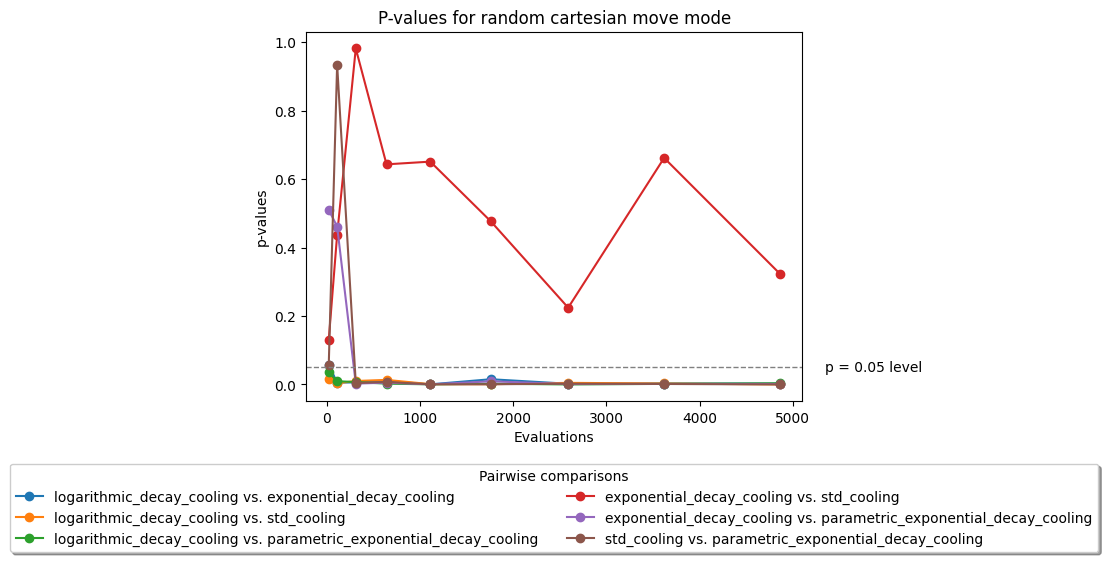

,20,110,310,640,1110,1760,2590,3620,4860
logarithmic_decay_cooling vs. exponential_decay_cooling,0.057,0.005**,0.006**,0.01*,0.0***,0.015*,0.002**,0.003**,0.002**
logarithmic_decay_cooling vs. std_cooling,0.015*,0.004**,0.01*,0.013*,0.001***,0.001***,0.005**,0.003**,0.0***
logarithmic_decay_cooling vs. parametric_exponential_decay_cooling,0.035*,0.009**,0.007**,0.002**,0.0***,0.002**,0.0***,0.002**,0.003**
exponential_decay_cooling vs. std_cooling,0.131,0.437,0.982,0.643,0.651,0.476,0.224,0.662,0.324
exponential_decay_cooling vs. parametric_exponential_decay_cooling,0.51,0.461,0.002**,0.005**,0.0***,0.009**,0.001**,0.001**,0.001**
std_cooling vs. parametric_exponential_decay_cooling,0.058,0.934,0.004**,0.007**,0.0***,0.001***,0.002**,0.001**,0.0***




random polar absolute move mode:


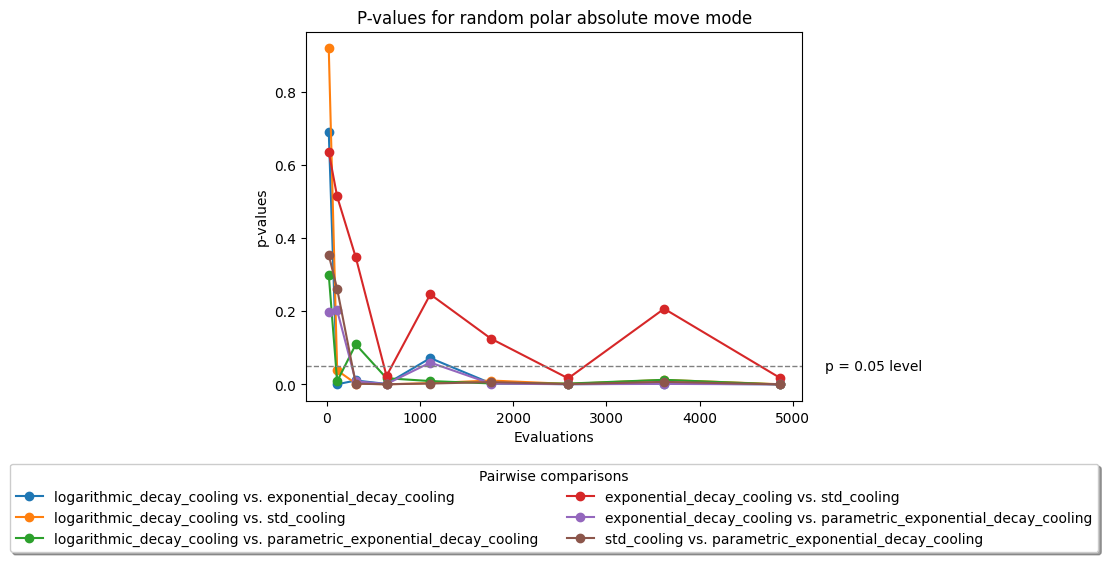

,20,110,310,640,1110,1760,2590,3620,4860
logarithmic_decay_cooling vs. exponential_decay_cooling,0.69,0.0***,0.011*,0.001**,0.072,0.003**,0.001***,0.002**,0.001***
logarithmic_decay_cooling vs. std_cooling,0.918,0.039*,0.003**,0.0***,0.004**,0.011*,0.001**,0.012*,0.001***
logarithmic_decay_cooling vs. parametric_exponential_decay_cooling,0.3,0.009**,0.109,0.017*,0.009**,0.003**,0.002**,0.013*,0.0***
exponential_decay_cooling vs. std_cooling,0.635,0.513,0.347,0.023*,0.246,0.125,0.017*,0.207,0.018*
exponential_decay_cooling vs. parametric_exponential_decay_cooling,0.197,0.202,0.009**,0.001**,0.06,0.002**,0.001***,0.002**,0.0***
std_cooling vs. parametric_exponential_decay_cooling,0.354,0.261,0.002**,0.001***,0.002**,0.006**,0.001***,0.007**,0.0***




random polar relative move mode:


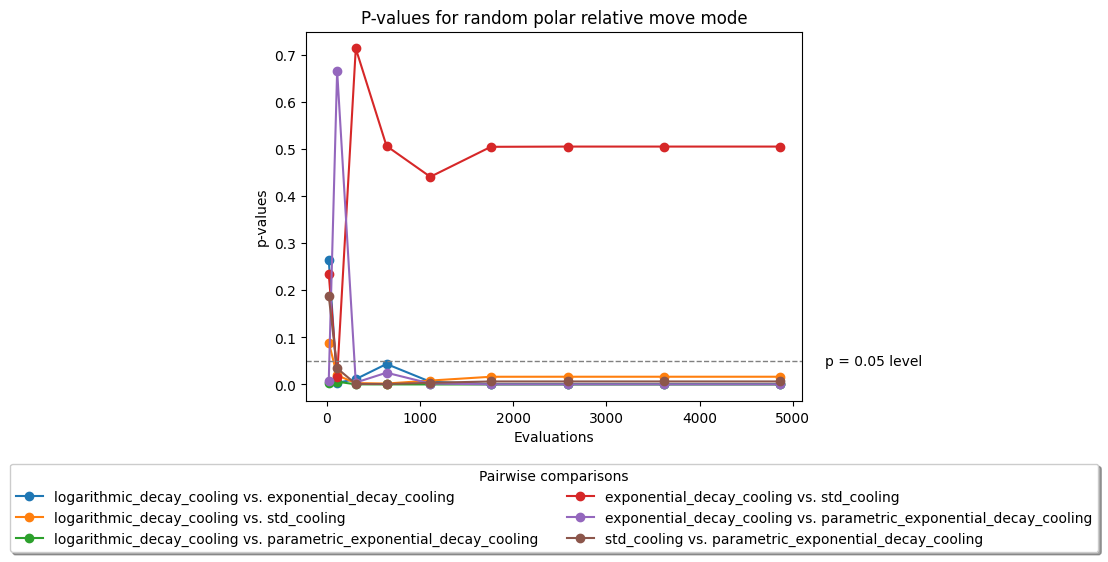

,20,110,310,640,1110,1760,2590,3620,4860
logarithmic_decay_cooling vs. exponential_decay_cooling,0.264,0.003**,0.011*,0.043*,0.006**,0.001***,0.001***,0.001***,0.001***
logarithmic_decay_cooling vs. std_cooling,0.089,0.019*,0.003**,0.002**,0.008**,0.016*,0.016*,0.016*,0.016*
logarithmic_decay_cooling vs. parametric_exponential_decay_cooling,0.002**,0.006**,0.0***,0.0***,0.0***,0.0***,0.0***,0.0***,0.0***
exponential_decay_cooling vs. std_cooling,0.235,0.016*,0.714,0.507,0.441,0.505,0.505,0.505,0.505
exponential_decay_cooling vs. parametric_exponential_decay_cooling,0.007**,0.667,0.004**,0.025*,0.002**,0.0***,0.0***,0.0***,0.0***
std_cooling vs. parametric_exponential_decay_cooling,0.188,0.034*,0.001**,0.001***,0.003**,0.006**,0.006**,0.006**,0.006**




repell move mode:


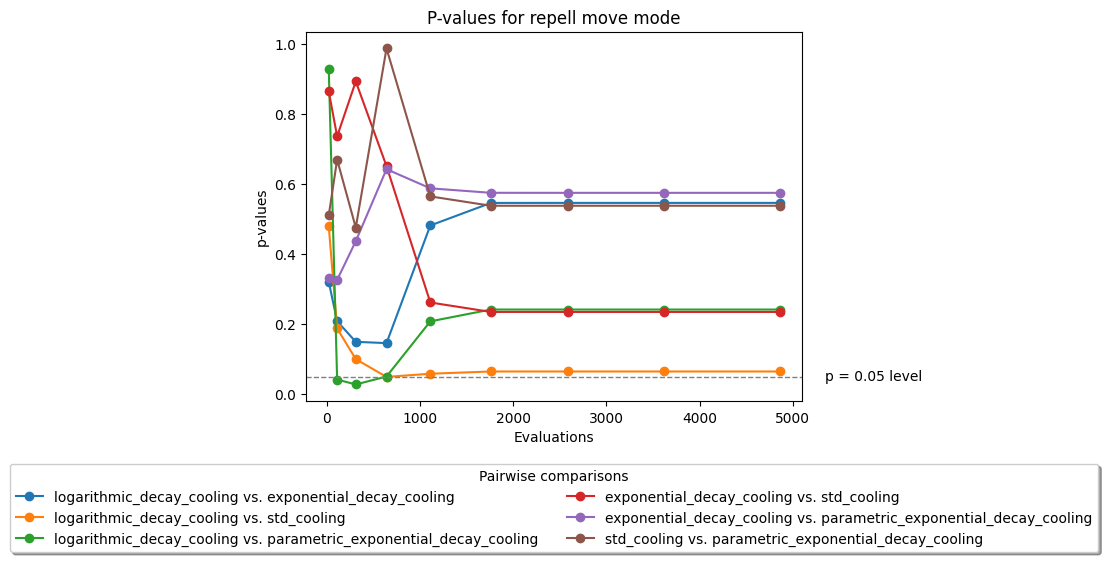

,20,110,310,640,1110,1760,2590,3620,4860
logarithmic_decay_cooling vs. exponential_decay_cooling,0.321,0.208,0.149,0.146,0.481,0.546,0.546,0.546,0.546
logarithmic_decay_cooling vs. std_cooling,0.479,0.187,0.1,0.049*,0.058,0.065,0.065,0.065,0.065
logarithmic_decay_cooling vs. parametric_exponential_decay_cooling,0.928,0.042*,0.028*,0.05,0.208,0.242,0.241,0.241,0.241
exponential_decay_cooling vs. std_cooling,0.864,0.736,0.892,0.651,0.262,0.235,0.235,0.235,0.235
exponential_decay_cooling vs. parametric_exponential_decay_cooling,0.332,0.326,0.436,0.642,0.587,0.574,0.574,0.574,0.574
std_cooling vs. parametric_exponential_decay_cooling,0.51,0.669,0.475,0.986,0.564,0.538,0.538,0.538,0.538




blend move mode:


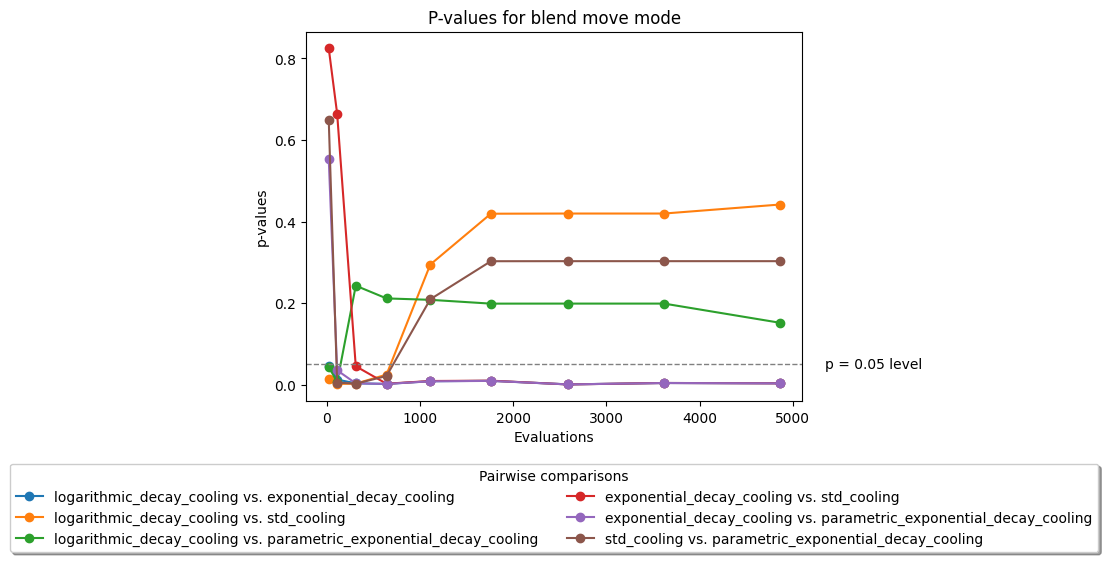

,20,110,310,640,1110,1760,2590,3620,4860
logarithmic_decay_cooling vs. exponential_decay_cooling,0.047*,0.013*,0.003**,0.002**,0.009**,0.01**,0.001***,0.004**,0.003**
logarithmic_decay_cooling vs. std_cooling,0.014*,0.002**,0.003**,0.025*,0.295,0.419,0.42,0.42,0.442
logarithmic_decay_cooling vs. parametric_exponential_decay_cooling,0.044*,0.006**,0.243,0.212,0.208,0.199,0.199,0.199,0.152
exponential_decay_cooling vs. std_cooling,0.825,0.665,0.045*,0.002**,0.009**,0.01**,0.001***,0.004**,0.003**
exponential_decay_cooling vs. parametric_exponential_decay_cooling,0.553,0.035*,0.003**,0.002**,0.008**,0.009**,0.001***,0.004**,0.003**
std_cooling vs. parametric_exponential_decay_cooling,0.648,0.005**,0.003**,0.021*,0.21,0.303,0.303,0.303,0.303


In [29]:
plot_move_mode_results(move_mode_dict, testing_intervals_converted_to_evals, mode='line', results_index = 'results_cooling')

# Markov length comparison

In [30]:
# This block of code is used to statistically test the different Markov length settings against each other

# Creating different combinations to test
markov_test_combinations = list(itertools.combinations(df['markov_length'].unique(), 2))

# Set n_intervals to desired amount of intervals, this is the amount of intervals that will be tested 
n_intervals = len(testing_intervals)

move_mode_dict_2 = {}
for move_mode in df['move_mode'].unique():
    markov_dict = {}  # Initialize inside the loop
    for markov_length in df['markov_length'].unique():
        df_sample = pd.DataFrame()
        for sim_id in df['local_sim_id'].unique():  # Iterate over unique simulation IDs
            # Filter the DataFrame
            df_filtered = df[(df['move_mode'] == move_mode) & 
                             (df['cooling_function'] == 'parametric_exponential_decay_cooling') & 
                             (df['markov_length'] == markov_length) & 
                             (df['local_sim_id'] == sim_id) & 
                             (df['sort_mode'] == 'random')]
            
            if not df_filtered.empty:  # Check if the filtered DataFrame is not empty
                df_sample[str(sim_id)] = df_filtered.iloc[0]['total_energy_over_time']

        if not df_sample.empty:  # Check if df_sample is not empty before assignment
            markov_dict[markov_length] = df_sample

    if markov_dict:  # Check if cooling_func_dict is not empty before assignment
        move_mode_dict_2[move_mode] = markov_dict

    # Initialize the results DataFrame for each move_mode
    results_markov = pd.DataFrame()

    # Iterate over each combination of cooling functions
    for combination in markov_test_combinations:
        print(move_mode_dict_2[move_mode])
        df_1 = move_mode_dict_2[move_mode][combination[0]]
        df_2 = move_mode_dict_2[move_mode][combination[1]]
        print(f'testing: {combination[0]} vs. {combination[1]}')

        p_values = []  # List to store p-values for each interval
        for interval in testing_intervals[:n_intervals]:
            sample_1 = df_1.iloc[interval, :].to_numpy()
            sample_2 = df_2.iloc[interval, :].to_numpy()
            test_result_p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)[1]
            p_values.append(test_result_p_value)

        # Correctly format the column name and assign the p-values
        col_name = f'{combination[0]} vs. {combination[1]}'
        results_markov[col_name] = p_values

    # Store the results DataFrame in move_mode_dict
    move_mode_dict_2[move_mode]['results_markov'] = results_markov

{12:              0          1          2          3          4
0    16.216318  23.496506  20.599666  27.086231  18.226896
1    18.305385  16.842708  18.328012  21.202954  23.188641
2    19.347966  19.439509  21.449312  18.933399  18.617093
3    20.222209  19.420174  21.975045  20.575050  20.910942
4    22.836636  22.793159  26.995987  19.274503  28.861675
..         ...        ...        ...        ...        ...
495  12.255804  12.414242  12.386199  12.256769  12.535290
496  12.255804  12.414242  12.386199  12.256769  12.535290
497  12.255804  12.414242  12.386199  12.256769  12.535290
498  12.255804  12.414242  12.386199  12.256769  12.535290
499  12.255804  12.414242  12.386199  12.256769  12.535290

[500 rows x 5 columns], 120:              0          1          2          3          4
0    22.232672  17.878429  21.675544  22.093988  23.870321
1    20.730418  19.177399  20.523040  21.350845  22.978028
2    24.433650  18.286811  20.436714  18.069702  19.426136
3    17.378467  16.96

{12:              0          1          2          3          4
0    25.341148  23.282318  20.099079  24.382539  20.115543
1    23.711753  25.731022  24.347592  31.447150  29.003699
2    35.510874  25.737526  31.206910  32.661224  21.079171
3    32.405930  32.707930  29.692088  23.414563  20.183803
4    34.980049  36.781457  27.209371  19.204482  37.722173
..         ...        ...        ...        ...        ...
495  12.388544  12.670082  12.494884  12.307827  12.371296
496  12.388544  12.670082  12.494884  12.307827  12.371296
497  12.388544  12.670082  12.494884  12.307827  12.371296
498  12.388544  12.601620  12.494884  12.307827  12.371296
499  12.388544  12.601620  12.494884  12.307827  12.371296

[500 rows x 5 columns], 120:              0          1          2          3          4
0    22.964759  22.560825  23.070663  20.982042  66.408211
1    22.533098  24.361774  32.502510  31.134821  31.376002
2    30.289128  39.966851  23.044662  15.910445  25.355503
3    23.260512  35.31

random cartesian move mode:


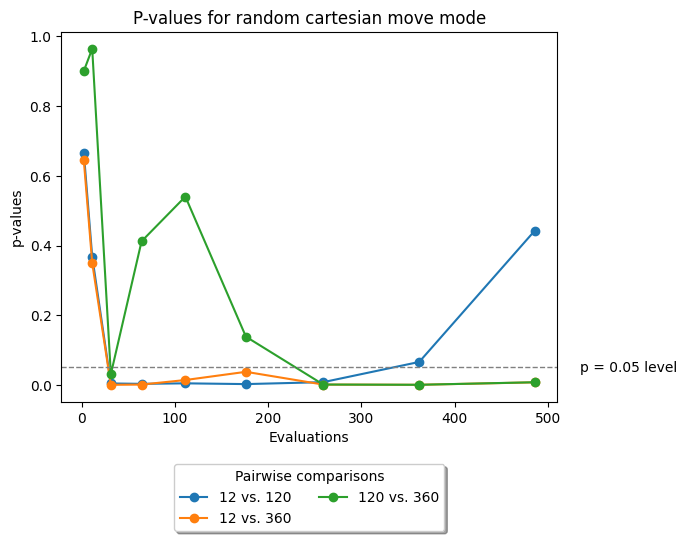

,2,11,31,64,111,176,259,362,486
12 vs. 120,0.666,0.368,0.004**,0.003**,0.004**,0.002**,0.008**,0.066,0.443
12 vs. 360,0.644,0.35,0.0***,0.001***,0.014*,0.038*,0.001***,0.0***,0.007**
120 vs. 360,0.901,0.965,0.031*,0.412,0.54,0.138,0.001**,0.0***,0.008**




random polar absolute move mode:


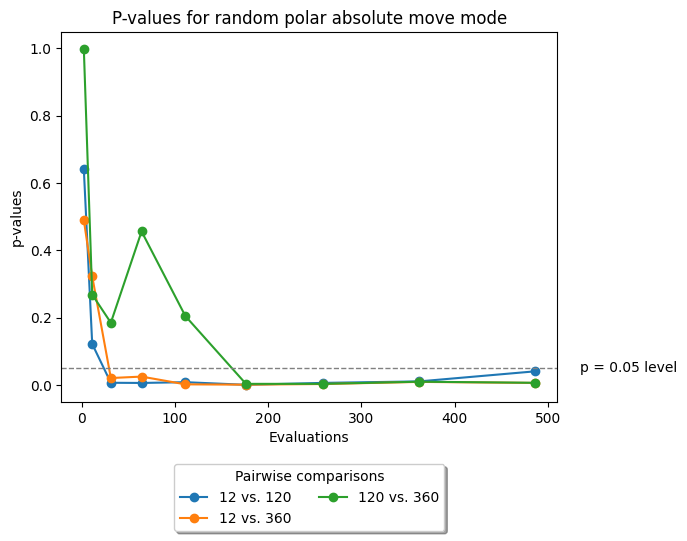

,2,11,31,64,111,176,259,362,486
12 vs. 120,0.641,0.121,0.006**,0.006**,0.008**,0.0***,0.006**,0.01*,0.04*
12 vs. 360,0.489,0.322,0.02*,0.025*,0.001**,0.001***,0.003**,0.009**,0.006**
120 vs. 360,0.998,0.268,0.185,0.456,0.204,0.003**,0.003**,0.009**,0.006**




random polar relative move mode:


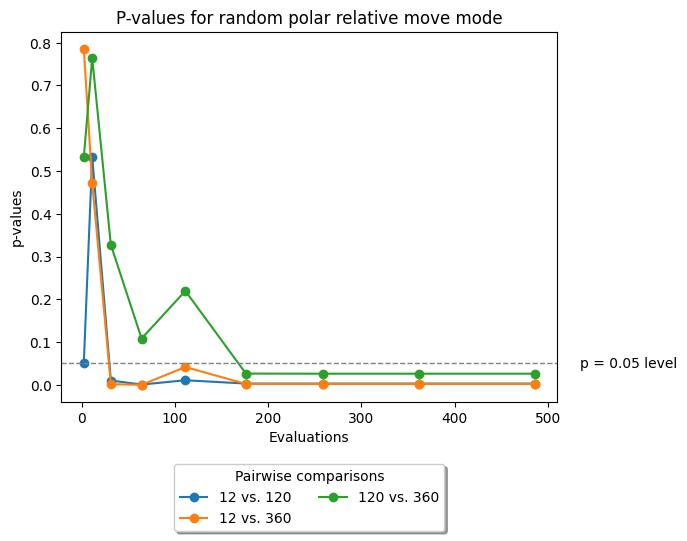

,2,11,31,64,111,176,259,362,486
12 vs. 120,0.052,0.533,0.01*,0.001***,0.011*,0.003**,0.003**,0.003**,0.003**
12 vs. 360,0.786,0.472,0.002**,0.0***,0.042*,0.002**,0.002**,0.002**,0.002**
120 vs. 360,0.533,0.764,0.328,0.108,0.22,0.026*,0.026*,0.026*,0.026*




repell move mode:


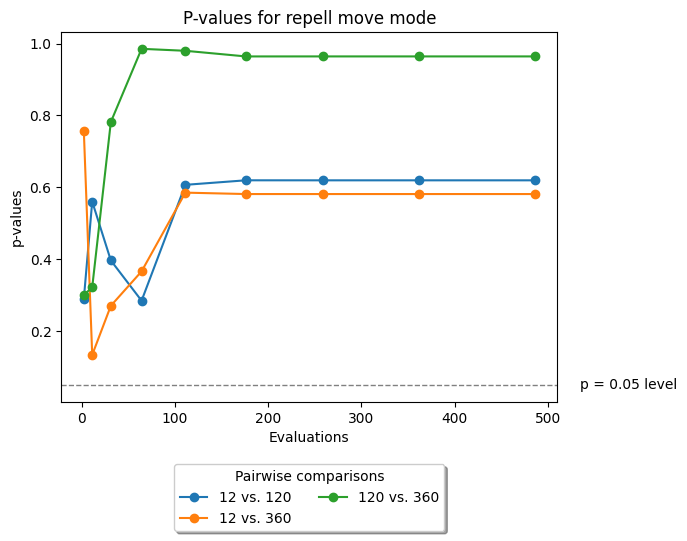

,2,11,31,64,111,176,259,362,486
12 vs. 120,0.289,0.56,0.396,0.284,0.607,0.619,0.619,0.619,0.619
12 vs. 360,0.757,0.133,0.27,0.366,0.585,0.581,0.581,0.581,0.581
120 vs. 360,0.3,0.321,0.782,0.986,0.98,0.964,0.964,0.964,0.964




blend move mode:


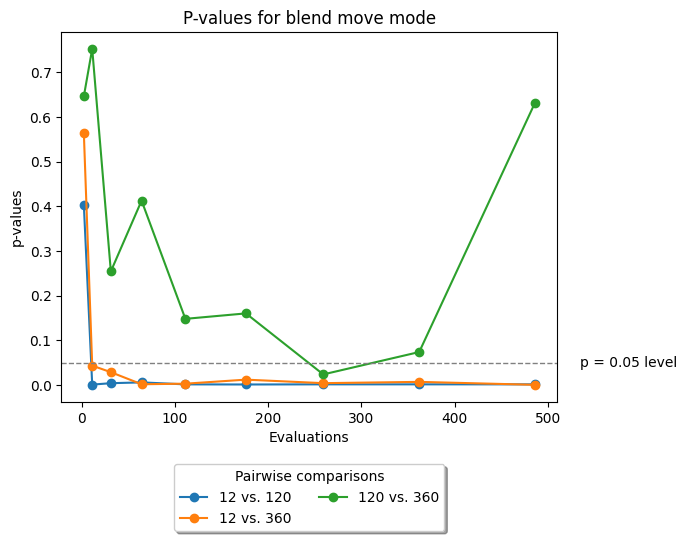

,2,11,31,64,111,176,259,362,486
12 vs. 120,0.403,0.001***,0.004**,0.005**,0.001**,0.001***,0.001**,0.001**,0.001**
12 vs. 360,0.565,0.043*,0.028*,0.001**,0.003**,0.012*,0.004**,0.007**,0.0***
120 vs. 360,0.646,0.753,0.254,0.413,0.148,0.16,0.023*,0.073,0.631


In [31]:
plot_move_mode_results(move_mode_dict_2, testing_intervals, mode='line', results_index = 'results_markov')

# Neighbouring procedure selection

In [32]:
sort_mode_combinations = list(itertools.combinations(df['sort_mode'].unique(), 2))

In [33]:
sort_mode_combinations

[('normal', 'energy'), ('normal', 'random'), ('energy', 'random')]

In [34]:
move_mode_dict.keys()

dict_keys(['random cartesian', 'random polar absolute', 'random polar relative', 'repell', 'blend'])

In [35]:
# This block of code is used to statistically test the cooling functions against each other

# Creating different combinations to test
sort_mode_combinations = list(itertools.combinations(df['sort_mode'].unique(), 2))

# Set n_intervals to desired amount of intervals, this is the amount of intervals that will be tested 
n_intervals = len(testing_intervals)

move_mode_dict_3 = {}
for move_mode in df['move_mode'].unique():
    print(move_mode)
    neighouring_dict = {}  # Initialize inside the loop
    for neighouring_function in df['sort_mode'].unique():
        df_sample = pd.DataFrame()
        for sim_id in df['local_sim_id'].unique():  # Iterate over unique simulation IDs
            # Filter the DataFrame
            df_filtered = df[(df['move_mode'] == move_mode) & 
                             (df['cooling_function'] == 'parametric_exponential_decay_cooling') & 
                             (df['markov_length'] == df['markov_length'].unique().max()) & 
                             (df['local_sim_id'] == sim_id) & 
                             (df['sort_mode'] == neighouring_function)]
            
            if not df_filtered.empty:  # Check if the filtered DataFrame is not empty
                df_sample[str(sim_id)] = df_filtered.iloc[0]['total_energy_over_time']

        if not df_sample.empty:  # Check if df_sample is not empty before assignment
            neighouring_dict[neighouring_function] = df_sample

    if neighouring_dict:  # Check if cooling_func_dict is not empty before assignment
        move_mode_dict_3[move_mode] = neighouring_dict

    # Initialize the results DataFrame for each move_mode
    results_neighbouring = pd.DataFrame()

    # Iterate over each combination of neighbouring functions
    for combination in sort_mode_combinations:
        df_1 = move_mode_dict_3[move_mode][combination[0]]
        df_2 = move_mode_dict_3[move_mode][combination[1]]
        print(f'testing: {combination[0]} vs. {combination[1]}')

        p_values = []  # List to store p-values for each interval
        for interval in testing_intervals[:n_intervals]:
            sample_1 = df_1.iloc[interval, :].to_numpy()
            sample_2 = df_2.iloc[interval, :].to_numpy()
            test_result_p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)[1]
            p_values.append(test_result_p_value)

        # Correctly format the column name and assign the p-values
        col_name = f'{combination[0]} vs. {combination[1]}'
        results_neighbouring[col_name] = p_values

    # Store the results DataFrame in move_mode_dict
    move_mode_dict_3[move_mode]['results_neighbouring'] = results_neighbouring

random cartesian
testing: normal vs. energy
testing: normal vs. random
testing: energy vs. random
random polar absolute
testing: normal vs. energy
testing: normal vs. random
testing: energy vs. random
random polar relative
testing: normal vs. energy
testing: normal vs. random
testing: energy vs. random
repell
testing: normal vs. energy
testing: normal vs. random
testing: energy vs. random
blend
testing: normal vs. energy
testing: normal vs. random
testing: energy vs. random


In [36]:
# # Creating different combinations to test sort modes
# sort_mode_combinations = list(itertools.combinations(df['sort_mode'].unique(), 2))

# # Defining sampling interval and other parameters
# n_evals = 5000
# testing_intervals = [int(20*x**2.5) for x in range(1, 10)]
# n_intervals = 3  # Set the desired amount of intervals for testing

# move_mode_dict = {}
# for move_mode in df['move_mode'].unique():
#     neighbouring_dict = {}  # Initialize inside the loop
#     for neighbouring_function in df['sort_mode'].unique():
#         df_sample = pd.DataFrame()
#         for sim_id in df['local_sim_id'].unique():  # Iterate over unique simulation IDs
#             # Filter the DataFrame for each sorting function
#             df_filtered = df[(df['move_mode'] == move_mode) & 
#                              (df['cooling_function'] == 'exponential_decay_cooling') & 
#                              (df['markov_length'] == df['markov_length'].unique().max()) & 
#                              (df['local_sim_id'] == sim_id) & 
#                              (df['sort_mode'] == neighbouring_function)]
            
#             if not df_filtered.empty:  # Check if the filtered DataFrame is not empty
#                 df_sample[str(sim_id)] = df_filtered.iloc[0]['total_energy_over_time']

#         if not df_sample.empty:  # Check if df_sample is not empty before assignment
#             neighbouring_dict[neighbouring_function] = df_sample

#     if neighbouring_dict:  # Check if neighbouring_dict is not empty before assignment
#         move_mode_dict[move_mode] = neighbouring_dict

#     # Initialize the results DataFrame for each move_mode
#     results_neighbouring = pd.DataFrame()

#     # Iterate over each combination of sort modes
#     for combination in sort_mode_combinations:
#         df_1 = move_mode_dict[move_mode][combination[0]]
#         df_2 = move_mode_dict[move_mode][combination[1]]
#         print(f'testing: {combination[0]} vs. {combination[1]}')

#         p_values = []  # List to store p-values for each interval
#         for interval in testing_intervals[:n_intervals]:
#             sample_1 = df_1.iloc[interval, :].to_numpy()
#             sample_2 = df_2.iloc[interval, :].to_numpy()
#             test_result_p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)[1]
#             p_values.append(test_result_p_value)

#         # Correctly format the column name and assign the p-values
#         col_name = f'{combination[0]} vs. {combination[1]}'
#         results_neighbouring[col_name] = p_values

#     # Store the results DataFrame in move_mode_dict
#     move_mode_dict[move_mode]['results_neighbouring'] = results_neighbouring

random cartesian move mode:


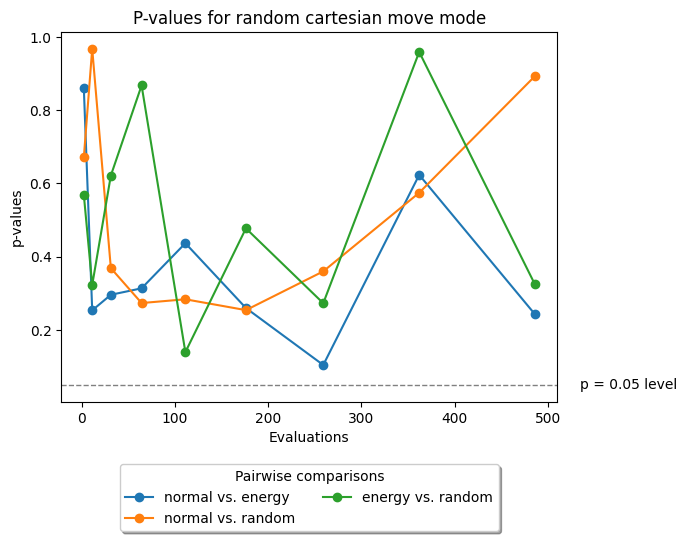

,2,11,31,64,111,176,259,362,486
normal vs. energy,0.86,0.253,0.296,0.313,0.436,0.26,0.104,0.623,0.243
normal vs. random,0.67,0.967,0.368,0.273,0.283,0.254,0.36,0.574,0.892
energy vs. random,0.569,0.322,0.621,0.867,0.139,0.477,0.273,0.958,0.325




random polar absolute move mode:


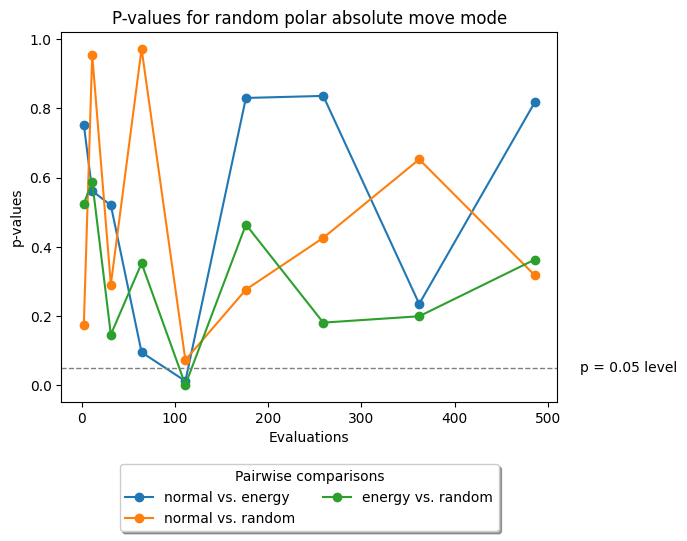

,2,11,31,64,111,176,259,362,486
normal vs. energy,0.753,0.561,0.52,0.095,0.012*,0.83,0.836,0.235,0.817
normal vs. random,0.173,0.955,0.291,0.972,0.073,0.276,0.426,0.653,0.318
energy vs. random,0.525,0.588,0.146,0.352,0.001**,0.464,0.181,0.199,0.363




random polar relative move mode:


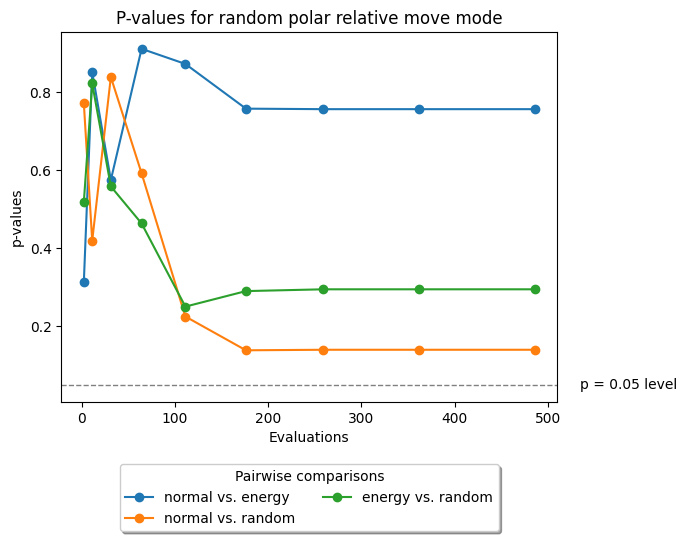

,2,11,31,64,111,176,259,362,486
normal vs. energy,0.313,0.852,0.575,0.912,0.873,0.758,0.757,0.757,0.757
normal vs. random,0.772,0.419,0.839,0.592,0.225,0.139,0.14,0.14,0.14
energy vs. random,0.519,0.823,0.559,0.464,0.251,0.29,0.295,0.295,0.295




repell move mode:


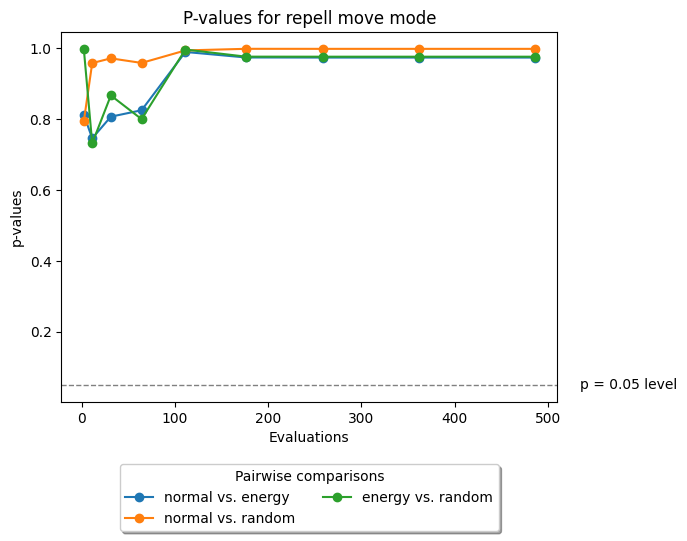

,2,11,31,64,111,176,259,362,486
normal vs. energy,0.812,0.745,0.806,0.824,0.989,0.973,0.973,0.973,0.973
normal vs. random,0.793,0.957,0.971,0.958,0.993,0.998,0.998,0.998,0.998
energy vs. random,0.997,0.731,0.866,0.799,0.996,0.976,0.975,0.975,0.975




blend move mode:


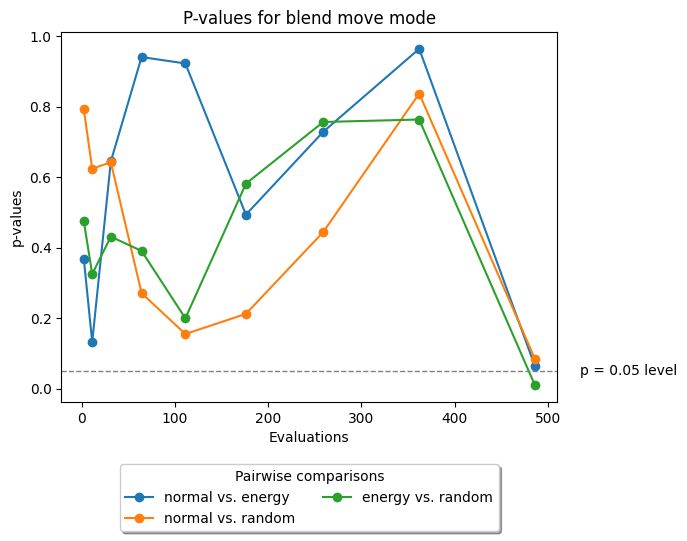

,2,11,31,64,111,176,259,362,486
normal vs. energy,0.368,0.132,0.645,0.941,0.922,0.493,0.729,0.964,0.065
normal vs. random,0.792,0.624,0.642,0.271,0.155,0.212,0.444,0.837,0.085
energy vs. random,0.475,0.325,0.431,0.39,0.199,0.581,0.756,0.763,0.011*


In [37]:
plot_move_mode_results(move_mode_dict_3, testing_intervals, mode='line', results_index = 'results_neighbouring')